Author: Rezki Dwi Rahmantyo

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
# Mengimport dataset
df = pd.read_csv("loan_customer.csv")
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [4]:
# Melihat sebaran data secara statistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
phone_number,569.0,5.468552e+11,1.987860e+11,6.281101e+10,6.281140e+11,6.281343e+11,6.285665e+11,6.287799e+11
applicant_income,612.0,5.681549e+03,9.056454e+03,1.500000e+02,2.874500e+03,3.812500e+03,5.815750e+03,1.705780e+05
coapplicant_income,621.0,1.616874e+03,2.915075e+03,0.000000e+00,0.000000e+00,1.167000e+03,2.302000e+03,4.166700e+04
loan_amount,621.0,1.451337e+05,8.401112e+04,9.000000e+03,1.000000e+05,1.250000e+05,1.650000e+05,7.000000e+05
loan_term_month,621.0,3.426087e+02,6.409084e+01,1.200000e+01,3.600000e+02,3.600000e+02,3.600000e+02,4.800000e+02
loan_term_year,621.0,2.855072e+01,5.340903e+00,1.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,4.000000e+01
credit_history,570.0,8.421053e-01,3.649626e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
# Melihat informasi terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

Dari informasi diatas terdapat beberapa informasi yang didapatkan:


1.   Terdiri dari 17 kolom/fitur dan 621 baris
2.   Terdapat 11 kolom yang memiliki missing value yaitu birth_date, phone_number, gender, married, dependents, education, self_employed, applicant_income, credit_history, has_credit_card, dan proprety_type

3.   Memiliki 4 fitur bertipe data float64, 3 int64, dan 10 object






In [6]:
# Ubah tipe data untuk fitur birth_date dan juga phone_number

df['birth_date'] = pd.to_datetime(df['birth_date'])
df['phone_number'] = df['phone_number'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        621 non-null    object        
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

# Data Cleansing

## Handling missing values

In [7]:
# Melihat jumlah missing value pada masing masing fitur

df.isnull().sum()

loan_id                 0
birth_date             49
phone_number            0
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

has_credit_card       85.83
credit_history         8.21
birth_date             7.89
self_employed          5.31
dependents             2.58
gender                 2.09
applicant_income       1.45
married                0.48
property_type          0.16
education              0.16
loan_term_year         0.00
loan_id                0.00
loan_term_month        0.00
loan_amount            0.00
coapplicant_income     0.00
phone_number           0.00
loan_status            0.00
dtype: float64


<ipython-input-8-3c63d5d2877f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')


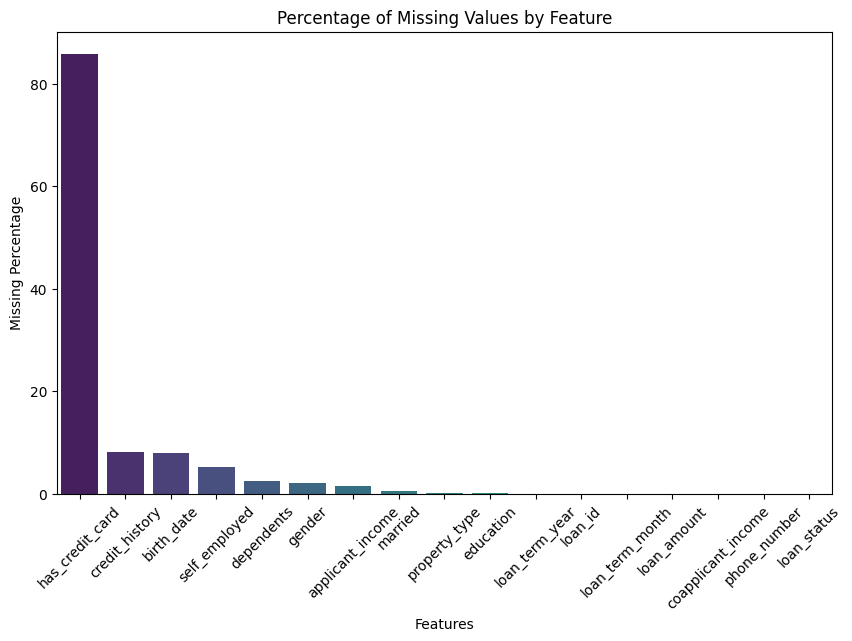

In [8]:
# Melihat presentase jumlah missing value pada masing-masing fitur
def missing(dff):
    missing_percentage = round((dff.isnull().sum() * 100 / len(dff)).sort_values(ascending=False), 2)
    print(missing_percentage)

    # Visualisasi
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Missing Percentage')
    plt.title('Percentage of Missing Values by Feature')
    plt.show()

missing(df)

Column: applicant_income
Statistic: 0.3025, p-value: 0.0000
applicant_income does not appear to be normally distributed (reject H0)


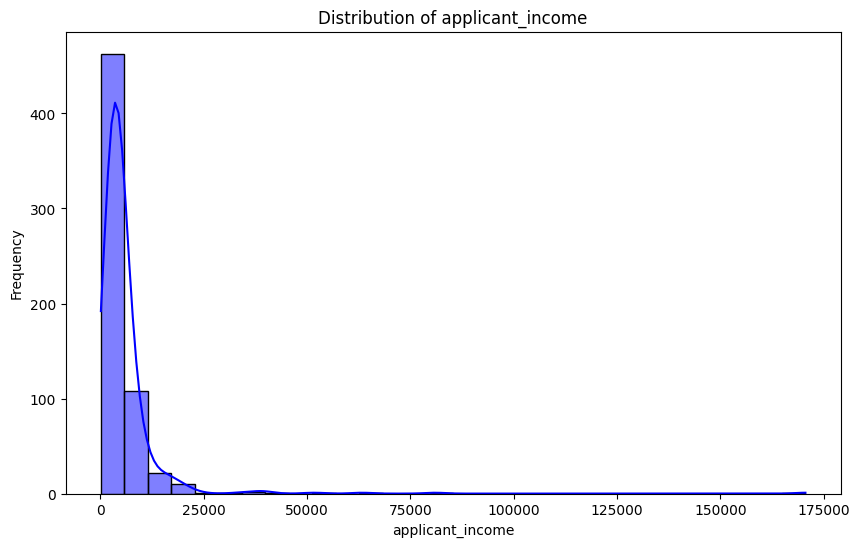



Column: coapplicant_income
Statistic: 0.4825, p-value: 0.0000
coapplicant_income does not appear to be normally distributed (reject H0)


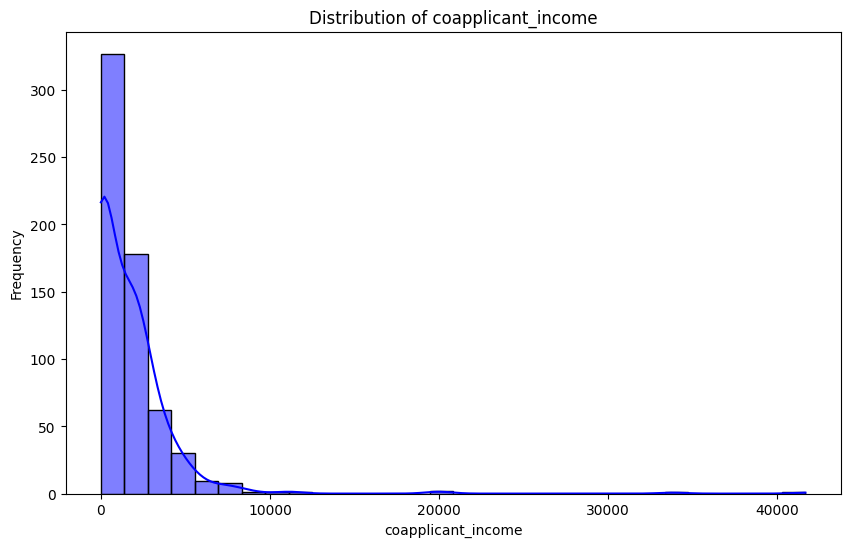



Column: loan_amount
Statistic: 0.7617, p-value: 0.0000
loan_amount does not appear to be normally distributed (reject H0)


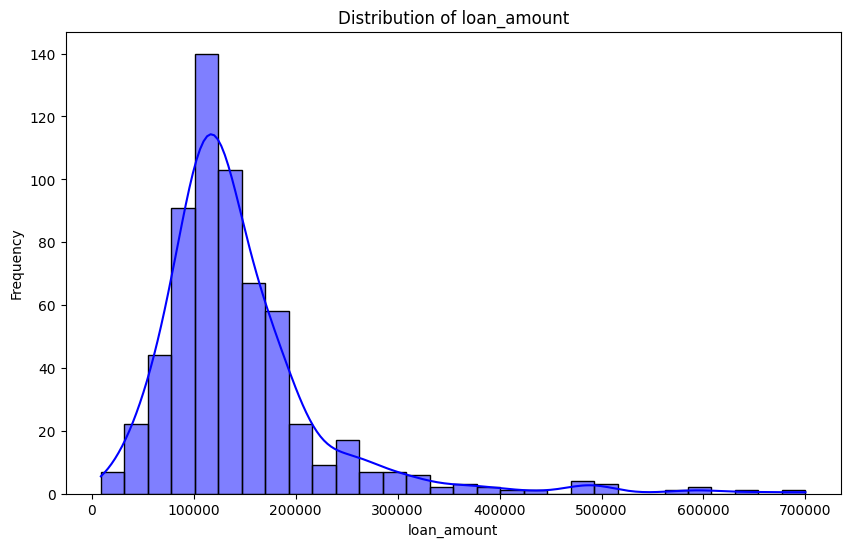



Column: loan_term_month
Statistic: 0.4680, p-value: 0.0000
loan_term_month does not appear to be normally distributed (reject H0)


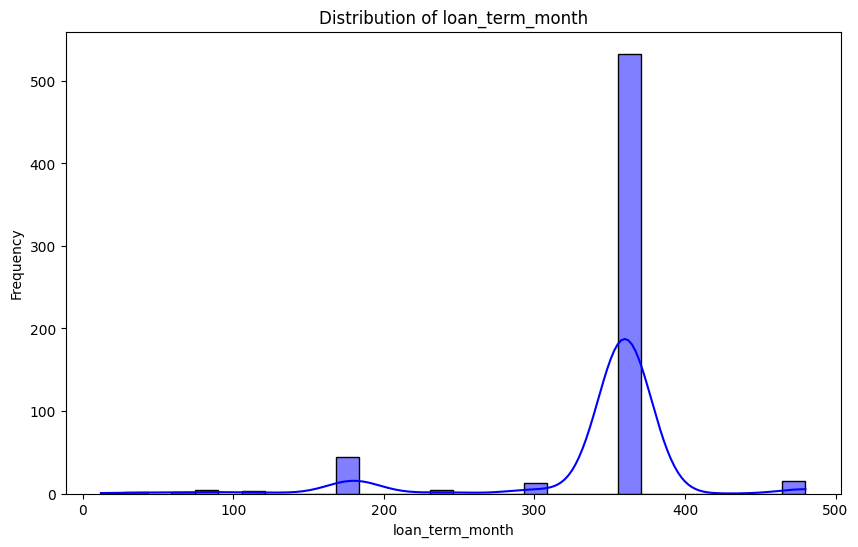



Column: loan_term_year
Statistic: 0.4680, p-value: 0.0000
loan_term_year does not appear to be normally distributed (reject H0)


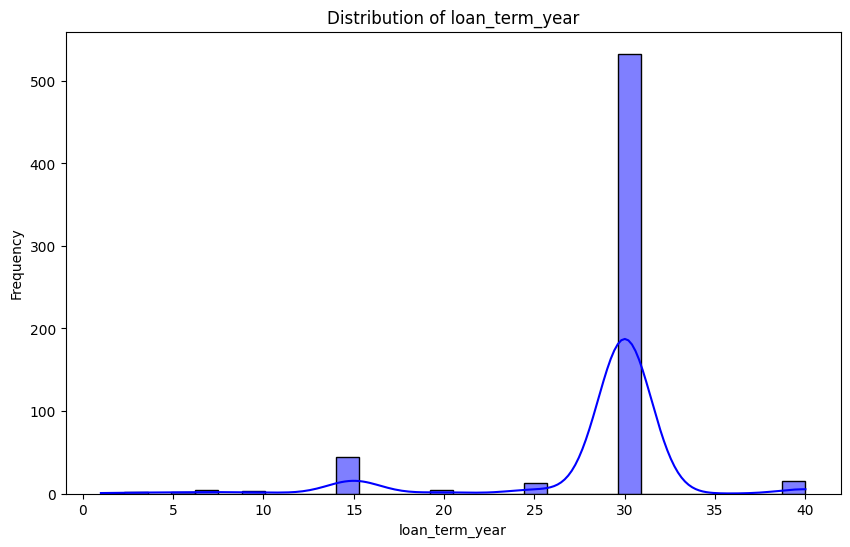



Column: credit_history
Statistic: 0.4374, p-value: 0.0000
credit_history does not appear to be normally distributed (reject H0)


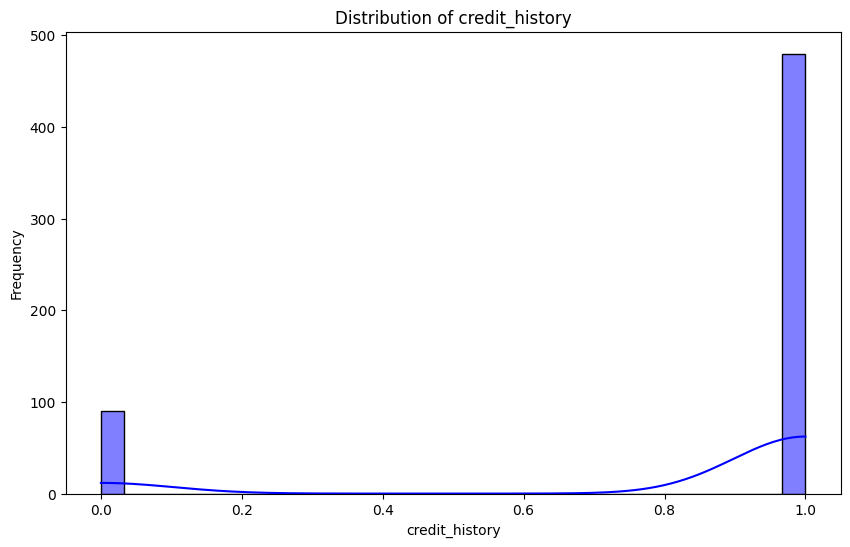

In [9]:
from scipy.stats import shapiro

# Memilih kolom dengan tipe data numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Mengecek distribusi untuk setiap kolom numerik
for col in numeric_cols:
    data = df[col].dropna()

    # Uji Shapiro-Wilk
    stat, p_value = shapiro(data)

    # Menampilkan hasil
    print(f'Column: {col}')
    print(f'Statistic: {stat:.4f}, p-value: {p_value:.4f}')

    # Interpretasi hasil
    alpha = 0.05
    if p_value > alpha:
        print(f'{col} appears to be normally distributed (fail to reject H0)')
    else:
        print(f'{col} does not appear to be normally distributed (reject H0)')

    # Visualisasi distribusi
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print("\n")


Dari jumlah missing value pada masing masing fitur diatas, langkah yang akan dilakukan untuk handling missing value adalah:


1.   Drop fitur has_credit_card ( dikarenakan memiliki jumlah missing value yang banyak )
2.   Mengisi missing value dengan nilai 0 pada fitur phone_number ( dikarenakan satu orang hanya satu nomor hp saja )

3.   Mengisi nilai median untuk fitur credit_history dan applicant_income ( dikarenakan bertipe data numerik dan distribusi datanya skewed )
4.   Mengisi nilai modus untuk fitur self_employed, dependents, gender, birth_date, married, education, dan property_type ( dikarenakan bertipe data kategorik )









In [10]:
# Menghapus fitur 'has_credit_card' dari DataFrame
df.drop('has_credit_card', axis=1, inplace=True)

# Mengisi missing value 0 untuk fitur phone_number
df['phone_number'].fillna(0, inplace=True)

# Mengisi nilai median untuk fitur credit_history dan applicant_income
df['applicant_income'].fillna(df['applicant_income'].median(), inplace=True)
df['credit_history'].fillna(df['credit_history'].median(), inplace=True)

# Mengisi nilai modus untuk fitur self_employed, dependents, gender, birth_date, married, education, dan property_type
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['married'].fillna(df['married'].mode()[0], inplace=True)
df['dependents'].fillna(df['dependents'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
df['property_type'].fillna(df['property_type'].mode()[0], inplace=True)
df['birth_date'].fillna(df['birth_date'].mode()[0], inplace=True)

# Menampilkan jumlah missing value setelah diisi
print(df.isnull().sum())

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64


## Handling duplicated data

In [11]:
# Melihat jumlah data yang duplikat
df.duplicated().sum()

5

In [12]:
# Menampilkan baris yang memiliki duplikat data
duplicate_rows = df[df.duplicated(keep=False)]

print("Baris dengan duplikat data:")
duplicate_rows

Baris dengan duplikat data:


,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
89,LP001310,1987-10-18,628131021360.0,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
90,LP001310,1987-10-18,628131021360.0,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
278,LP001904,1986-01-30,62811520563.0,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
279,LP001904,1986-01-30,62811520563.0,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
307,LP001990,1980-08-03,628527921833.0,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,house,REJECT
308,LP001990,1980-08-03,628527921833.0,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,house,REJECT
362,LP002160,1990-11-27,628115255742.0,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,apartment,APPROVE
363,LP002160,1990-11-27,628115255742.0,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,apartment,APPROVE
400,LP002277,1972-06-12,628138392877.0,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,house,REJECT
401,LP002277,1972-06-12,628138392877.0,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,house,REJECT


In [13]:
# Menghapus baris yang duplikat
df.drop_duplicates(inplace=True)

In [14]:
# Mengecek kembali jumlah data yang duplikat
df.duplicated().sum()

0

## Handling Outlier

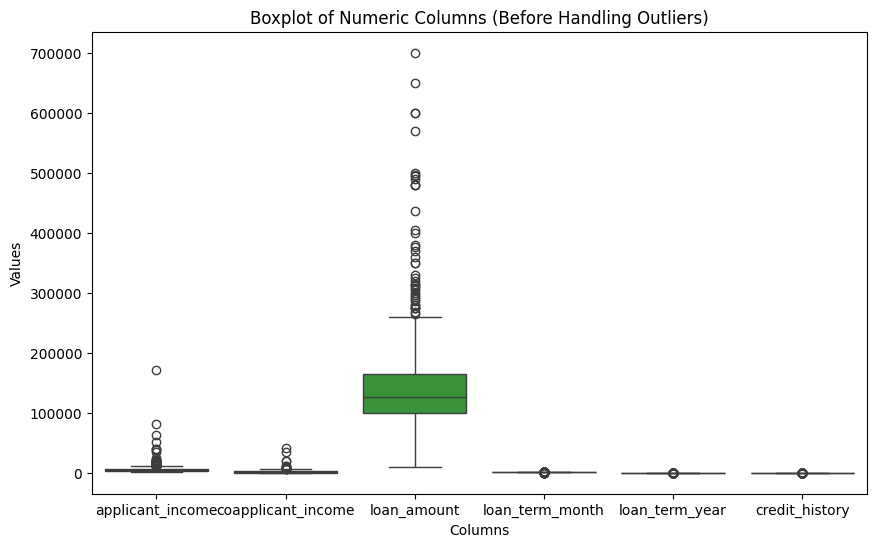

In [15]:
numeric_columns = ["applicant_income","coapplicant_income",
                   "loan_amount","loan_term_month","loan_term_year"
                   ,"credit_history"]

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot of Numeric Columns (Before Handling Outliers)')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

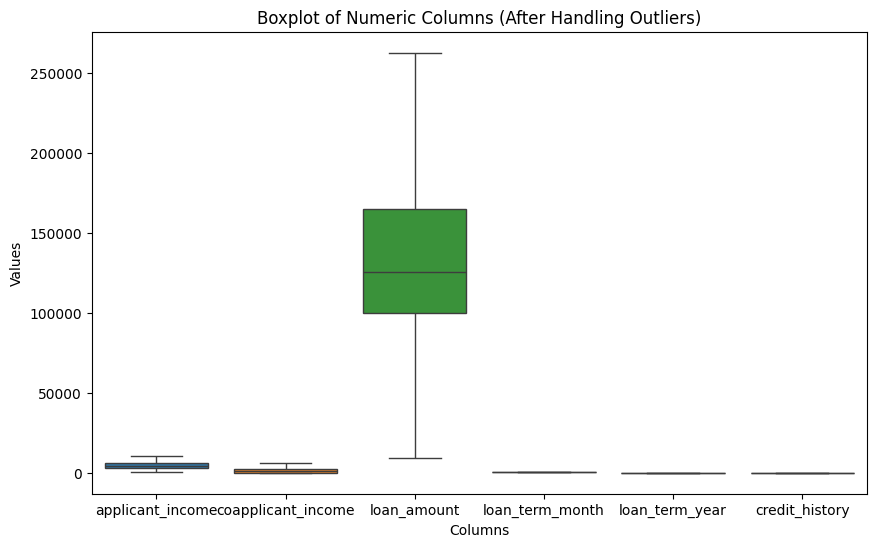

In [16]:
# Fungsi untuk mengatasi outliers dengan IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else
                (lower_bound if x < lower_bound else x))
    return df

for column in numeric_columns:
    df = handle_outliers(df, column)

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot of Numeric Columns (After Handling Outliers)')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

## Feature Encoding

Fitur-fitur yang akan dilakukan encoding:


*   gender
*   married

*   dependents
*   education

*   self_employed
*   property_type

*   loan_status










In [17]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000.0,360.0,30.0,1.0,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000.0,360.0,30.0,1.0,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000.0,360.0,30.0,1.0,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000.0,360.0,30.0,1.0,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000.0,360.0,30.0,1.0,house,APPROVE


In [18]:
# Mapping masing masing fitur

mapping_gender = {'Male': 0, 'Female': 1}
mapping_married = {'No': 0, 'Yes': 1}
mapping_dependents = {"0": 0, "1": 1, "2": 2, "3": 3}
mapping_education = {'Not Graduate': 0, 'Graduate': 1}
mapping_self_employed = {'No': 0, 'Yes': 1}
mapping_property_type = {'house': 0, 'studio': 1, "apartment": 2}
mapping_loan_status = {'REJECT': 0, 'APPROVE': 1}

df['gender'] = df['gender'].map(mapping_gender)
df['married'] = df['married'].map(mapping_married)
df['dependents'] = df['dependents'].map(mapping_dependents)
df['education'] = df['education'].map(mapping_education)
df['self_employed'] = df['self_employed'].map(mapping_self_employed)
df['property_type'] = df['property_type'].map(mapping_property_type)
df['loan_status'] = df['loan_status'].map(mapping_loan_status)

In [19]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,0,0,0.0,1,0,5849.0,0.0,100000.0,360.0,30.0,1.0,0,1
1,LP001003,1979-08-24,628776449212.0,0,1,1.0,1,0,4583.0,1508.0,128000.0,360.0,30.0,1.0,1,0
2,LP001005,1991-03-28,628119240537.0,0,1,0.0,1,1,3000.0,0.0,66000.0,360.0,30.0,1.0,0,1
3,LP001006,1980-06-02,62856343702.0,0,1,0.0,0,0,2583.0,2358.0,120000.0,360.0,30.0,1.0,0,1
4,LP001008,1989-05-19,628113008687.0,0,0,0.0,1,0,6000.0,0.0,141000.0,360.0,30.0,1.0,0,1


# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

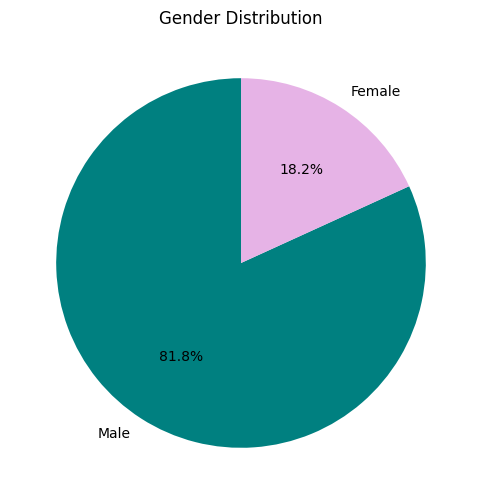

In [20]:
# Pie chart for gender
gender_counts = df['gender'].value_counts()
labels = ['Male' if gender == 0 else 'Female' for gender in gender_counts.index]
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, colors=['#008080', '#e6b3e6'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

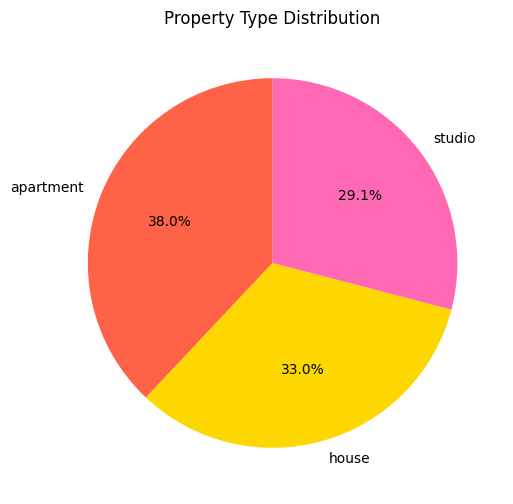

In [21]:
# Pie chart for property_type
property_counts = df['property_type'].value_counts()
labels = ['house' if prop == 0 else 'studio' if prop == 1 else 'apartment' for prop in property_counts.index]
plt.figure(figsize=(6, 6))
plt.pie(property_counts, labels=labels, colors=['#FF6347', '#FFD700', '#FF69B4'], autopct='%1.1f%%', startangle=90)
plt.title('Property Type Distribution')
plt.show()

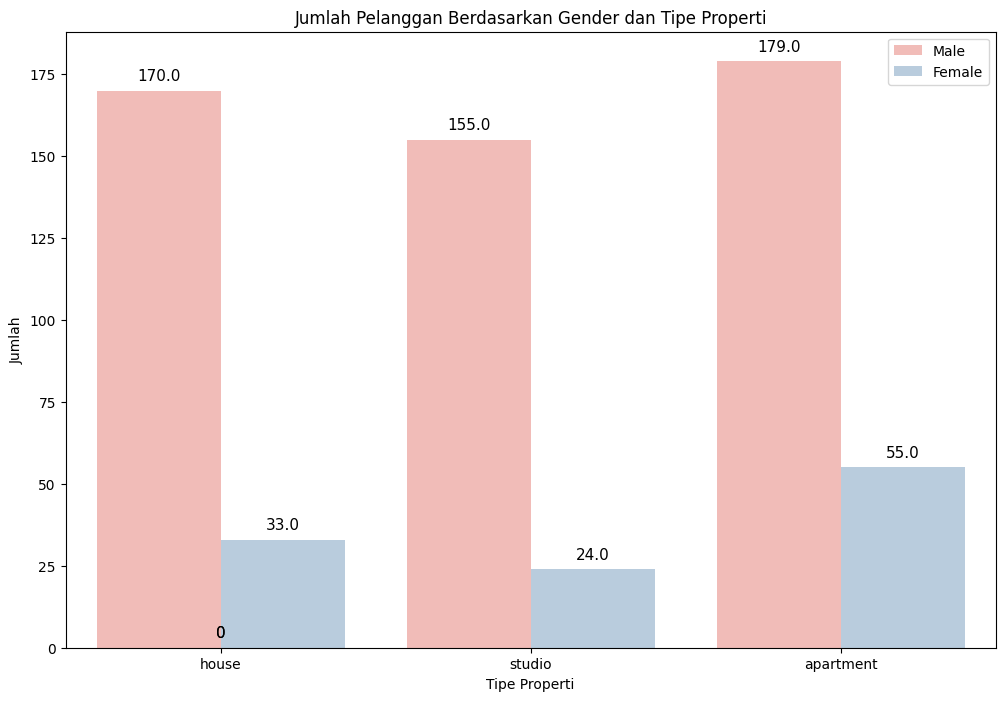

In [22]:
# Hitung jumlah pelanggan berdasarkan gender dan tipe properti
gender_property_count = df.groupby(['property_type', 'gender']).size().reset_index(name='count')

# Membuat bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='property_type', y='count', hue='gender', data=gender_property_count, palette='Pastel1')

# Tambahkan label pada tiap batang
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Mengembalikan label sumbu x dan y ke bentuk aslinya
labels_gender = {v: k for k, v in mapping_gender.items()}
labels_property_type = {v: k for k, v in mapping_property_type.items()}
plt.xticks(ticks=range(len(labels_property_type)), labels=[labels_property_type[i] for i in range(len(labels_property_type))])
plt.xlabel('Tipe Properti')

# Mengembalikan label legenda untuk gender ke bentuk aslinya
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=[labels_gender[int(label)] for label in labels])

plt.title('Jumlah Pelanggan Berdasarkan Gender dan Tipe Properti')
plt.ylabel('Jumlah')
plt.show()

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

<ipython-input-23-7739a810418f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='married', data=df, palette='Set3')


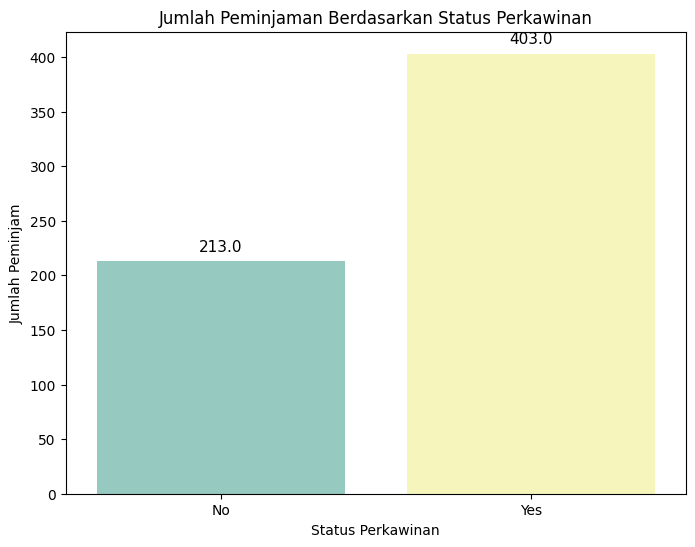

In [23]:
# Membuat count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='married', data=df, palette='Set3')

# Tambahkan label pada tiap batang
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Mengembalikan label sumbu x ke bentuk aslinya
labels_married = {v: k for k, v in mapping_married.items()}
plt.xticks(ticks=[0, 1], labels=[labels_married[i] for i in [0, 1]])
plt.xlabel('Status Perkawinan')

plt.title('Jumlah Peminjaman Berdasarkan Status Perkawinan')
plt.ylabel('Jumlah Peminjam')
plt.show()

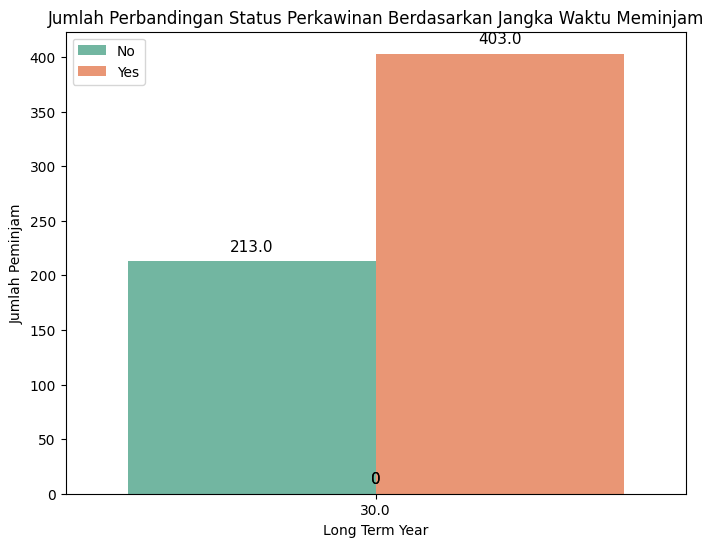

In [24]:
# Menghitung jumlah perbandingan antara yang sudah menikah dan yang belum menikah
count_df = df.groupby(['loan_term_year', 'married']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(x='loan_term_year', y='count', hue='married', data=count_df, palette='Set2')

# Menambahkan label pada tiap batang
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Mengembalikan label sumbu x ke bentuk aslinya
plt.xlabel('Long Term Year')

# Mengembalikan label legenda untuk married ke bentuk aslinya
labels_married = {v: k for k, v in mapping_married.items()}
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=[labels_married[int(label)] if label.isdigit() else label for label in labels])

plt.title('Jumlah Perbandingan Status Perkawinan Berdasarkan Jangka Waktu Meminjam')
plt.ylabel('Jumlah Peminjam')
plt.show()